In [1]:
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

https://learn.astropy.org/tutorials/2-Coordinates-Transforms.html

In [2]:
def coordinates_aitoff_plot(coords):
    fig, ax = plt.subplots(figsize=(10, 4), 
                           subplot_kw=dict(projection="aitoff"))
    
    sph = coords.spherical
    cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                    sph.lat.radian,
                    c=sph.distance.value)

    def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'

    ticker = mpl.ticker.FuncFormatter(fmt_func)
    ax.xaxis.set_major_formatter(ticker)

    ax.grid()
    
    cb = fig.colorbar(cs)
    cb.set_label('distance [pc]')
    
    return fig, ax

In [3]:
df = pd.read_csv('data/phl_data.csv')

In [31]:
df['x_hand'] = df['S_DISTANCE'] * np.cos(df['S_DEC']) * np.cos(df['S_RA'])
df['y_hand'] = df['S_DISTANCE'] * np.cos(df['S_DEC']) * np.sin(df['S_RA'])
df['z_hand'] = df['S_DISTANCE'] * np.sin(df['S_DEC'])

In [4]:
open_cluster_c = SkyCoord(
    ra=df['S_RA']*u.deg,
    dec=df['S_DEC']*u.deg,
    distance=df['S_DISTANCE']*u.pc)

Text(0, 0.5, 'Dec [deg]')

c:\Python311\Lib\site-packages\numpy\lib\function_base.py:3639: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y


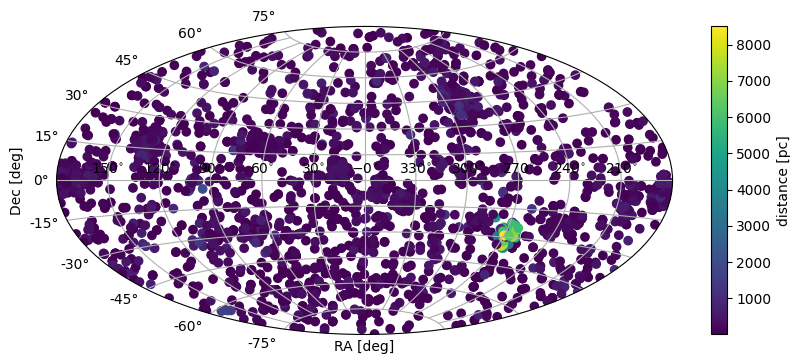

In [5]:
fig, ax = coordinates_aitoff_plot(open_cluster_c)
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

To Cartesian

In [34]:
cartesian_coord = open_cluster_c.represent_as('cartesian')
df['x'] = cartesian_coord.x.value
df['y'] = cartesian_coord.y.value
df['z'] = cartesian_coord.z.value

In [35]:
df.to_csv('data/phl_data_cart.csv', index=False)